# Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from sklearn.metrics import classification_report

# Call the Data

In [31]:
from tensorflow.keras.datasets import cifar10

In [32]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

In [33]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Visualization

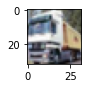

In [34]:
plt.figure(figsize = (1,1))

plt.imshow(train_images[1])


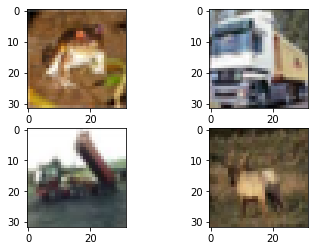

In [35]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Normalising the data

In [36]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Build the model

In [37]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(32, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                98336     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs=3,batch_size=64)

Epoch 1/3
782/782 [==============================] - 3s 3ms/step - loss: 1.9699
Epoch 2/3
782/782 [==============================] - 3s 4ms/step - loss: 1.8553
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 1.8198


In [39]:
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [40]:
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.41      0.34      0.37      1000
           1       0.47      0.38      0.42      1000
           2       0.20      0.11      0.14      1000
           3       0.26      0.12      0.17      1000
           4       0.33      0.24      0.28      1000
           5       0.33      0.30      0.31      1000
           6       0.35      0.55      0.42      1000
           7       0.29      0.58      0.39      1000
           8       0.38      0.41      0.40      1000
           9       0.43      0.45      0.44      1000

    accuracy                           0.35     10000
   macro avg       0.34      0.35      0.33     10000
weighted avg       0.34      0.35      0.33     10000



# Build the CNN model

In [45]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(16,(2,2),activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten())

cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 16)        2064      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 10)              

In [46]:
cnn_model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy')
cnn_model.fit(train_images,train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
782/782 [==============================] - 39s 50ms/step - loss: 1.6884
Epoch 2/5
782/782 [==============================] - 37s 48ms/step - loss: 1.3887
Epoch 3/5
782/782 [==============================] - 37s 48ms/step - loss: 1.3039
Epoch 4/5
782/782 [==============================] - 37s 47ms/step - loss: 1.2501
Epoch 5/5
782/782 [==============================] - 37s 47ms/step - loss: 1.2007


In [47]:
predicted_labels = cnn_model.predict(test_images)
predicted_labels = np.argmax(predicted_labels,axis = 1)

313/313 [==============================] - 3s 9ms/step


In [48]:
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62      1000
           1       0.74      0.70      0.72      1000
           2       0.44      0.34      0.38      1000
           3       0.43      0.36      0.39      1000
           4       0.41      0.67      0.51      1000
           5       0.55      0.47      0.51      1000
           6       0.58      0.79      0.67      1000
           7       0.66      0.60      0.63      1000
           8       0.68      0.65      0.67      1000
           9       0.70      0.59      0.65      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000

